Попытка фитирования импульсов экспонентой

In [1]:
import os
import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit, leastsq

In [2]:
pulsar_name = '0531+21'
files = sorted(glob.glob('results_by_08.05.2019/gp_plot_txt/*' + pulsar_name + '*.csv'))

In [16]:
def my_exp(x, a, b, k):
    return a*np.exp(b*x + k)

In [5]:
profile = np.genfromtxt(files[5], skip_header=6)
profile = profile/max(profile)

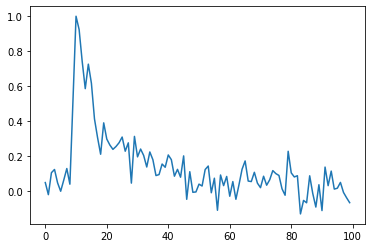

In [12]:
plt.close()
plt.plot(profile[:])
plt.show()

In [15]:
y = profile[10:]
x = range(len(y))

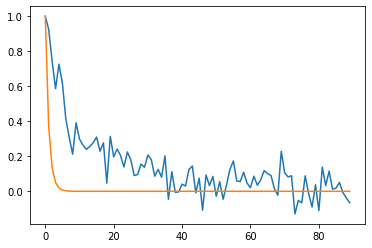

In [25]:
plt.close()
plt.plot(x, y)
plt.plot(x, [my_exp(i, 1, -1, 0) for i in x])
plt.show()

Directory doesn't exist


TypeError: Improper input: N=3 must not exceed M=2

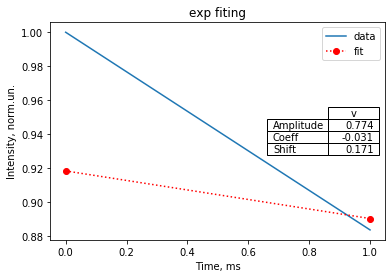

In [34]:
try:
    shutil.rmtree('./exp_fiting_pulse_' + pulsar_name)
except FileNotFoundError:
    print('Directory doesn\'t exist')
os.mkdir('./exp_fiting_pulse_' + pulsar_name)
for file in files:
    profile = np.genfromtxt(file, skip_header=6)
    profile = profile/max(profile)
    
    A = 1
    B = -1
    K = 0
    popt,pcov = curve_fit(my_exp,x,y,p0=[A, B, K])

    y = profile[10:]
    x = range(len(y))

    columns = ('value')
    rows = ['Amplitude','Coeff','Shift']
    popt = [round(i, 3) for i in popt]
    table_vals=[[popt[0],],[popt[1],],[popt[2],]]

    plt.close()
    plt.title('exp fiting')
    the_table = plt.table(cellText=table_vals,
                      colWidths = [0.15]*3,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center right')

    plt.plot(x,y, label='data')
    plt.plot(x, my_exp(x,*popt),'ro:',label='fit')
    #plt.axvline(popt[1], color='b', ls='--', label='mean')
    plt.legend()
    plt.ylabel('Intensity, norm.un.')
    plt.xlabel('Time, ms')
    #plt.xlim(150,225)
    plt.savefig('./exp_fiting_pulse_'
                + pulsar_name
                + os.sep
                + os.path.basename(file)[:-4]
                + '.png', format='png', dpi=200)
    #plt.show()

In [27]:
popt

array([ 0.58690687, -0.07764642,  0.36439   ])

In [31]:
np.sqrt(np.diag(pcov))

array([1.25351107e+06, 6.48643515e-03, 2.15396016e+06])